In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import math
import ntpath, glob
from ipy_table import *

In [2]:
import sys
sys.path.append('../../common/')
from data_quality_analysis_functions import *
from data_visualization_functions import *
from data_normalization_functions import *
from data_input_output_functions import *

In [3]:
data_path = '../../CF_output/annotated_data/constructiveness_and_toxicity_annotations.csv'

In [4]:
df = pd.read_csv(data_path)

Index(['article_id', 'article_author', 'article_published_date',
       'article_title', 'article_url', 'article_text', 'comment_author',
       'comment_counter', 'comment_text', 'agree_constructiveness_expt',
       'agree_toxicity_expt', 'constructive', 'constructive_binary',
       'crowd_toxicity_level', 'has_content', 'crowd_discard',
       'constructive_characteristics', 'non_constructive_characteristics',
       'toxicity_characteristics', 'crowd_comments_constructiveness_expt',
       'crowd_comments_toxicity_expt', 'other_con_chars', 'other_noncon_chars',
       'other_toxic_chars'],
      dtype='object')

In [ ]:
df.columns

# Preliminary examination of constructiveness and toxicity columns

In [5]:
df['constructive'].describe()

count    10000.000000
mean         0.529107
std          0.437068
min          0.000000
25%          0.000000
50%          0.600000
75%          1.000000
max          1.000000
Name: constructive, dtype: float64

In [6]:
df['crowd_toxicity_level'].describe()

count    10000.000000
mean         1.158846
std          0.296423
min          1.000000
25%          1.000000
50%          1.000000
75%          1.200000
max          3.200000
Name: crowd_toxicity_level, dtype: float64

## Histograms

In [7]:
df.hist(column = ['constructive', 'crowd_toxicity_level'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1156ba710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115af4da0>]], dtype=object)

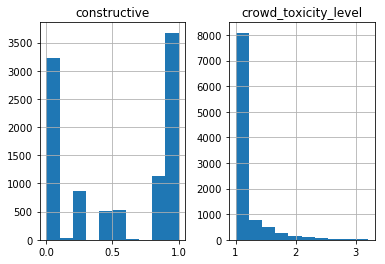

In [8]:
plt.show()

# Histogram for agree_constructiveness_expt

In [9]:
df.hist(column = ['agree_constructiveness_expt', 'agree_toxicity_expt'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115bf7358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116148b00>]], dtype=object)

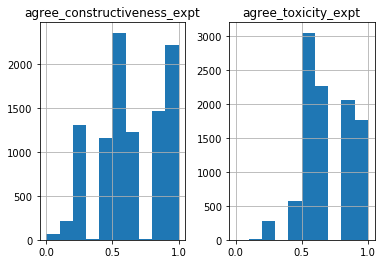

In [10]:
plt.show()

In [11]:
df.plot.scatter(x='constructive',
                y='crowd_toxicity_level',
                c='DarkBlue')

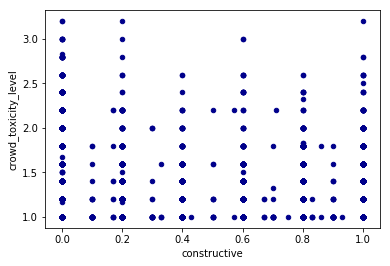

In [12]:
plt.show()

# TODO: Look at the comments by decile and qualitatively assess comments and ranking

# Secret gold question agreement levels

In [21]:
annotated_data_path = '../../CF_output/combined/'

In [22]:
batches = [3,4,5,6,7,8,9,10,11,12]

In [16]:
# Starting from batch three we have included internal gold questions for toxicity and constructiveness (20 each) with 
# internal_gold_constructiveness flag True. In the code below, we examine to what extent the annotators agreed with 
# these internal gold questions. 

In [18]:
results = {}
for batch in batches:
    results['batch' + str(batch)] = {}
    batch_csv = annotated_data_path + 'batch' + str(batch) + '_constructiveness_and_toxicity_combined.csv'
    
    df = pd.read_csv(batch_csv)
    results['batch' + str(batch)]['constructiveness_disagreement'] = secret_gold_evaluation_constructiveness(df)
    results['batch' + str(batch)]['toxicity_disagreement'] = secret_gold_evaluation_toxicity(df)

In [19]:
dictList = [['Batch', 'Constructiveness disagreement (%)', 'Toxicity disagreement (%)']]

In [20]:
for key, value in results.items():
    dictList.append([key, 
                     value['constructiveness_disagreement'], 
                     value['toxicity_disagreement'],
                    ])


In [18]:
make_table(dictList)

Batch,Constructiveness disagreement (%),Toxicity disagreement (%)
batch3,10.0000,5.0000
batch4,9.0900,4.7600
batch5,0.0000,5.0000
batch6,5.0000,5.0000
batch7,4.7600,0.0000
batch8,0.0000,10.0000
batch9,0.0000,10.0000
batch10,0.0000,0.0000
batch11,5.0000,10.0000
batch12,5.0000,10.0000


In [19]:
# apply some styles to the table after it is created
set_column_style(0, width='50', bold=True, color='hsla(225, 80%, 94%, 1)')
set_row_style(0, bold=True)
set_global_style(float_format='%0.2f')

Batch,Constructiveness disagreement (%),Toxicity disagreement (%)
batch3,10.00,5.00
batch4,9.09,4.76
batch5,0.00,5.00
batch6,5.00,5.00
batch7,4.76,0.00
batch8,0.00,10.00
batch9,0.00,10.00
batch10,0.00,0.00
batch11,5.00,10.00
batch12,5.00,10.00


# Inter-annotator agreement

## Inter-annotator agreement for constructiveness

In [22]:
constructiveness_path = '../../CF_output/constructiveness/'

In [23]:
toxicity_path = '../../CF_output/toxicity/'

In [24]:
results = {}

In [25]:
for batch in batches:
    print('\n\nCalculating inter-annotator agreement for batch: ', batch)
    results['batch' + str(batch)] = {}
    constructiveness_csv = get_full_annotation_csv(constructiveness_path + 'batch' + str(batch) + '/', batch)
    df = pd.read_csv(constructiveness_csv)

    constructiveness_df = discard_ambiguous_rows(df, 'constructive')
    constructiveness_krippendorff_alpha = calculate_inter_annotator_agreement(constructiveness_df, 'constructive')    
    results['batch' + str(batch)]['constructiveness_krippendorff_alpha'] = constructiveness_krippendorff_alpha        
    
    toxicity_csv = get_full_annotation_csv(toxicity_path + 'batch' + str(batch) + '/', batch)    
    df = pd.read_csv(toxicity_csv)    
    
    df['crowd_toxicity_level_binary'] = df['crowd_toxicity_level'].apply(binarize_toxicity)
    #df.to_csv('tmp.csv', index = False)
    toxicity_krippendorff_alpha = calculate_inter_annotator_agreement(df, 'crowd_toxicity_level_binary')    
    results['batch' + str(batch)]['toxicity_krippendorff_alpha'] = toxicity_krippendorff_alpha        
    



Calculating inter-annotator agreement for batch:  3
Length of the data:  41
Krippendorff's alpha with nominal metric: 0.671
Length of the data:  44
Krippendorff's alpha with nominal metric: 0.233


Calculating inter-annotator agreement for batch:  4
Length of the data:  49
Krippendorff's alpha with nominal metric: 0.664
Length of the data:  59
Krippendorff's alpha with nominal metric: 0.286


Calculating inter-annotator agreement for batch:  5
Length of the data:  37
Krippendorff's alpha with nominal metric: 0.692
Length of the data:  48
Krippendorff's alpha with nominal metric: 0.289


Calculating inter-annotator agreement for batch:  6
Length of the data:  58
Krippendorff's alpha with nominal metric: 0.639
Length of the data:  57
Krippendorff's alpha with nominal metric: 0.275


Calculating inter-annotator agreement for batch:  7
Length of the data:  59
Krippendorff's alpha with nominal metric: 0.690
Length of the data:  48
Krippendorff's alpha with nominal metric: 0.283


Calculat

In [26]:
results

{'batch10': {'constructiveness_krippendorff_alpha': 0.79882940595779195,
  'toxicity_krippendorff_alpha': 0.20606837963837943},
 'batch11': {'constructiveness_krippendorff_alpha': 0.78986551775150704,
  'toxicity_krippendorff_alpha': 0.21678075689786003},
 'batch12': {'constructiveness_krippendorff_alpha': 0.78082295373665489,
  'toxicity_krippendorff_alpha': 0.16453256949494643},
 'batch3': {'constructiveness_krippendorff_alpha': 0.6713190018767643,
  'toxicity_krippendorff_alpha': 0.23345799401359069},
 'batch4': {'constructiveness_krippendorff_alpha': 0.66447062410723567,
  'toxicity_krippendorff_alpha': 0.28634503346333473},
 'batch5': {'constructiveness_krippendorff_alpha': 0.69209829708171533,
  'toxicity_krippendorff_alpha': 0.28905519723507866},
 'batch6': {'constructiveness_krippendorff_alpha': 0.63915028585682099,
  'toxicity_krippendorff_alpha': 0.27485196946685342},
 'batch7': {'constructiveness_krippendorff_alpha': 0.68965590580552938,
  'toxicity_krippendorff_alpha': 0.28

In [27]:
dictList = [['Batch', "Krippendorff's alpha (constructiveness)", "Krippendorff's alpha (toxicity)"]]

In [28]:
for key, value in results.items():
    dictList.append([key, 
                     value['constructiveness_krippendorff_alpha'], 
                     value['toxicity_krippendorff_alpha']
                    ])


In [29]:
make_table(dictList)

Batch,Krippendorff's alpha (constructiveness),Krippendorff's alpha (toxicity)
batch3,0.6713,0.2335
batch4,0.6645,0.2863
batch5,0.6921,0.2891
batch6,0.6392,0.2749
batch7,0.6897,0.2834
batch8,0.6873,0.2026
batch9,0.7203,0.1815
batch10,0.7988,0.2061
batch11,0.7899,0.2168
batch12,0.7808,0.1645


# TODO: what extent annotators overlap among experiments? 

# TODO: For constructive and toxic comments, what's the correlation between constructiveness score and has_content columns? 